### Load the Dataset

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Titanic-Dataset.csv')

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data=df.copy()

###  Data Cleaning

In [52]:
#Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [53]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)  # Drop Cabin due to many missing values


In [54]:
#Check for duplicates and inconsistencies
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

0


### Exploratory Data Analysis (EDA)

In [55]:
#Descriptive Statistics
print(data.info())
print(data.describe())
print(data.describe(include=['O']))  # For categorical data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
m

#### Univariate Analysis

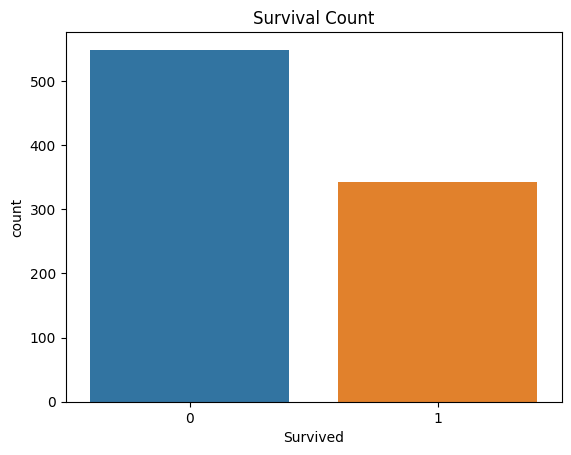

In [78]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

The count plot shows the number of survivors vs non-survivors. It appears there are fewer survivors than non-survivors.


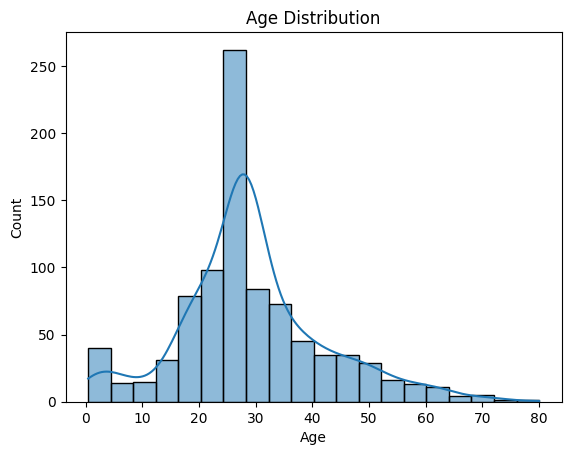

In [77]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


Age distribution is slightly skewed towards younger passengers with a noticeable peak around 20-40 years.

#### Bivariate Analysis

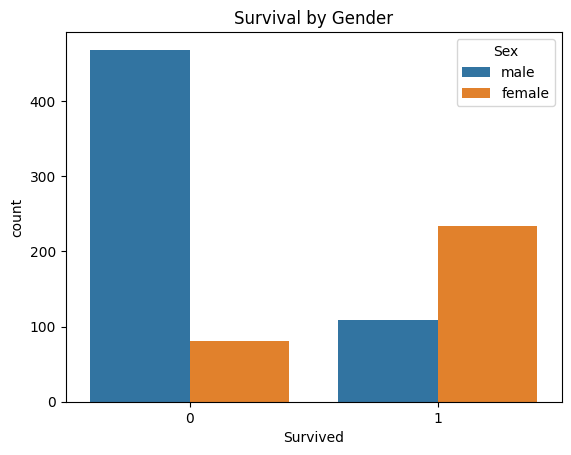

In [57]:
#Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()

Women had a significantly higher survival rate (around 74%) compared to men (around 
19%).

In [58]:
print((data.groupby('Sex')['Survived'].value_counts(normalize=True))*100)

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64


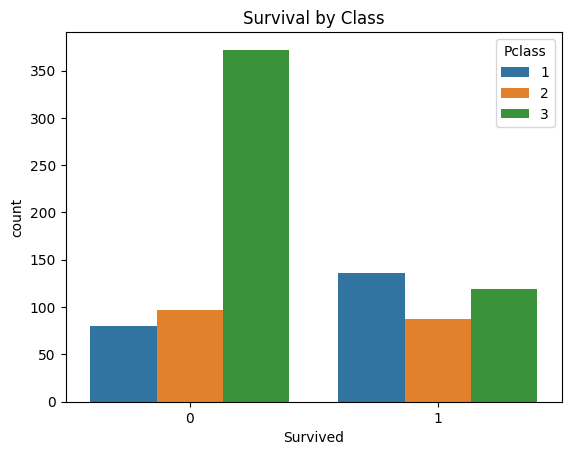

In [59]:
#Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Class')
plt.show()

In [60]:
print((data.groupby('Pclass')['Survived'].value_counts(normalize=True))*100)

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64


 Passengers in 1st class had the highest survival rate (~63%), while 3rd class had the lowest (~25%).


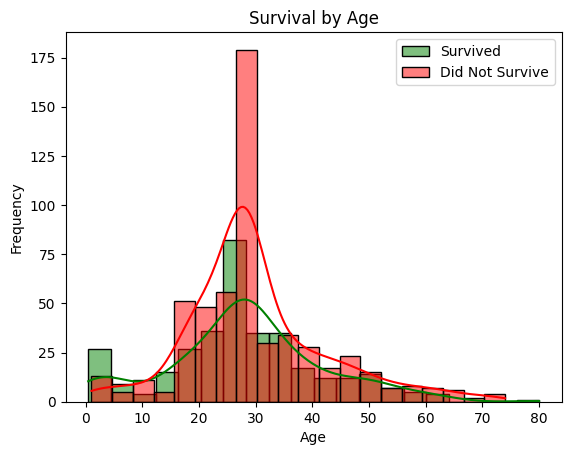

In [61]:
# Age distribution of survivors
sns.histplot(data[data['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Did Not Survive')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Survivors tend to be younger passengers, with a higher concentration in the age range of 0-15 years and 30-50 years.


In [62]:
# Define age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], 
                          labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Survival rate by age group
print(data.groupby('AgeGroup')['Survived'].value_counts(normalize=True))


AgeGroup     Survived
Child        1           0.579710
             0           0.420290
Teenager     0           0.571429
             1           0.428571
Young Adult  0           0.646729
             1           0.353271
Adult        0           0.600000
             1           0.400000
Senior       0           0.772727
             1           0.227273
Name: Survived, dtype: float64


Children and teenagers had a significantly higher survival rate compared to adults and seniors.


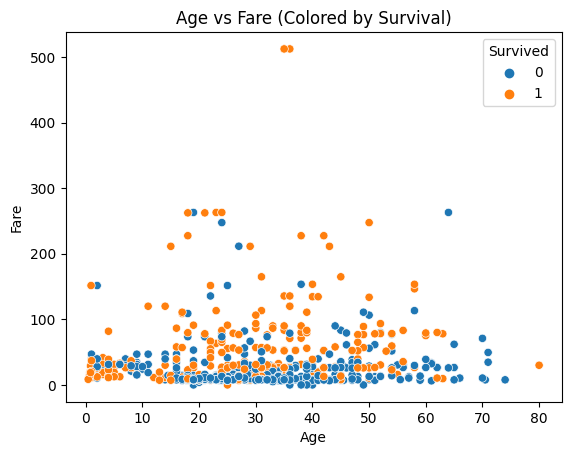

In [63]:
#scatter plots for numerical variables
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

 There is no strong linear relationship between Age and Fare, but passengers with a higher Fare tended to survive more.


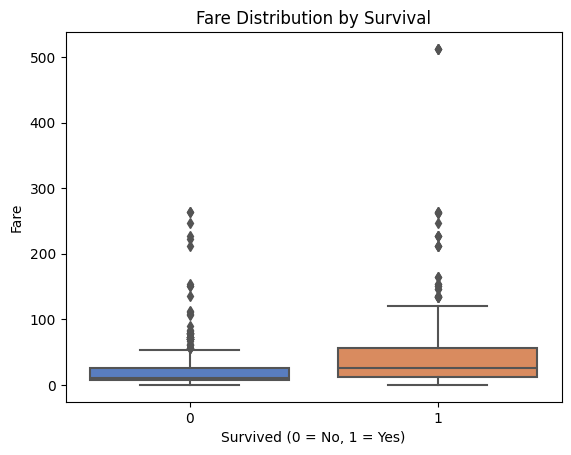

In [ ]:
# Fare distribution by survival
sns.boxplot(x='Survived', y='Fare', data=data, palette='muted')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


In [46]:
print(data.groupby('Survived')['Fare'].median())

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


The median Fare for survivors is higher than that for non-survivors, suggesting that wealthier passengers had a higher chance of survival.


#### Multivariate Analysis

C:\Users\Oumaima Toufali\AppData\Local\Temp\ipykernel_40664\372661873.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


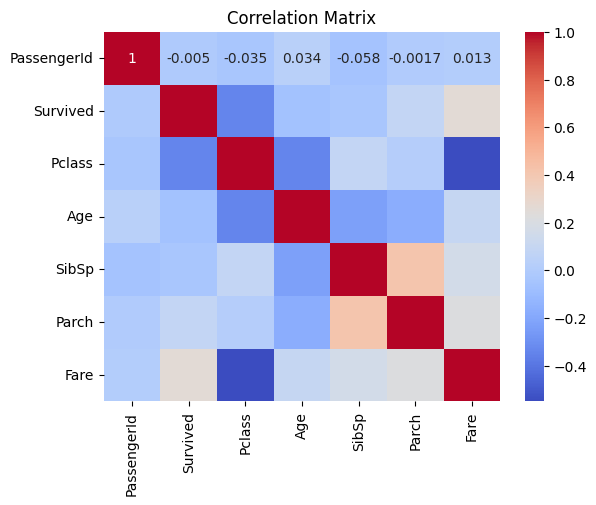

In [29]:
# a heatmap to explore correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


Fare shows the highest correlation with survival, followed by Pclass and Age. There is a weak correlation between Age and Fare.


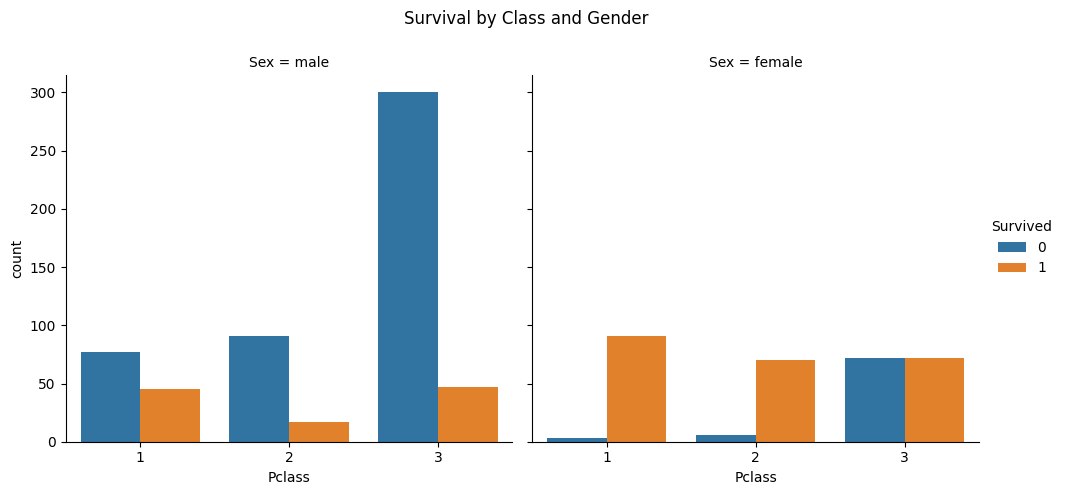

In [ ]:
#Analyze survival rates across multiple features
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=df)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Class and Gender')
plt.show()

In [73]:
print(data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True))

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


The highest survival rate is seen in 1st class for both genders, and 3rd class passengers had a much lower survival rate.
